In [1]:
from datasets.dataset_fake import fake_dataset
from datasets.dataset_real import myDataset
import torch
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
import detection.transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.Normalize())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [3]:
dataset_fake = fake_dataset("blender/out", "backgrounds_coco", 1000, (2, 5), 700, (250, 500), None)
dataset_real = myDataset('db_lisa_tiny', None)

In [4]:
model_real = torch.load("models/model_real_fasterrcnn_mobilenet_v3_large_fpn")
model_real.to(torch.device("cpu"))
model_real = model_real.eval()

model_fake = torch.load("models/everything_mb3l/epoch_5.pth")
model_fake.to(torch.device("cpu"))
model_fake = model_fake.eval()

In [5]:
import random
transform = get_transform(False)


label2col = {1:(255, 0, 0), 2:(0, 255, 0), 3:(0, 0, 255), 4:(255, 255, 0), 5:(255, 0, 255), 6:(0, 255, 255), 7:(255, 255, 255), 8:(0, 0, 0), 9:(128, 128, 128)}
#img, t = dataset_fake.__getitem__(0)
#img, t = transform(img, t)
#print(model([img]))
def show_dataset_anns(dataset, iterations):
    for i in range(iterations):
        img, target = dataset.__getitem__(random.randrange(0, len(dataset)))
        img = np.array(img)
        output = target
        for box, label in zip(output["boxes"], output["labels"]):
            cv.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), label2col[label.item()], 3)
        img = Image.fromarray(img)
        plt.figure()
        plt.imshow(img)
        plt.show() 
def test_dataset(dataset, model, iterations):
    for i in range(iterations):
        img, target = dataset.__getitem__(random.randrange(0, len(dataset)))
        img_t, target_t = transform(img, target)
        img = np.array(img)
        output = model([img_t])[0]
        for box, label, score in zip(output["boxes"], output['labels'], output['scores']):
            cv.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), label2col[label.item()], 3)
        img = Image.fromarray(img)
        plt.figure()
        plt.imshow(img)
        plt.show()

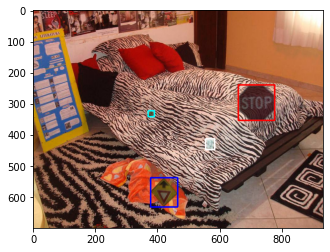

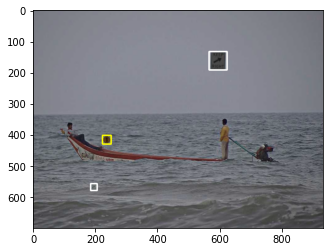

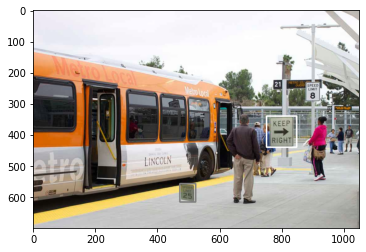

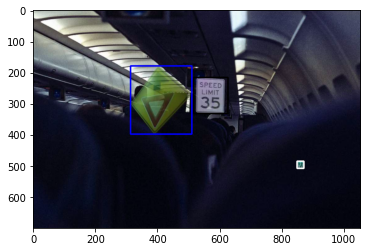

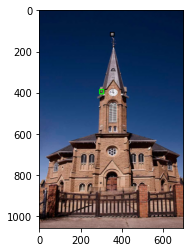

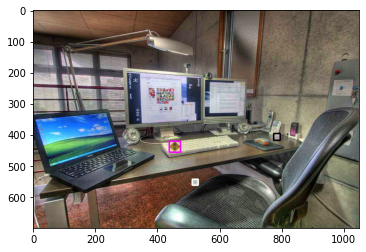

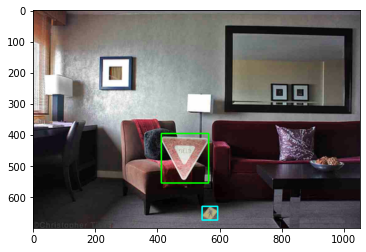

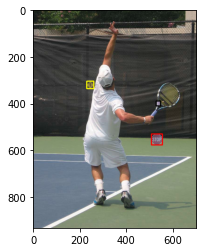

In [6]:
show_dataset_anns(dataset_fake, 8)

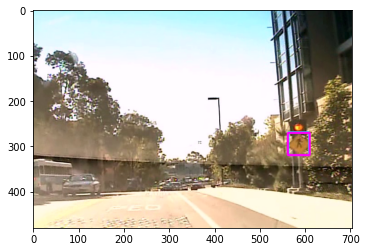

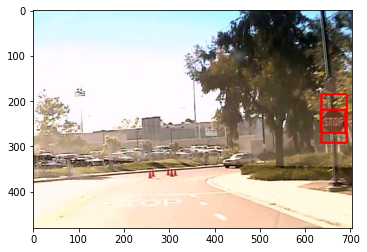

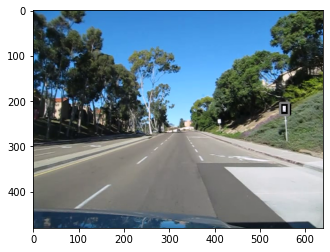

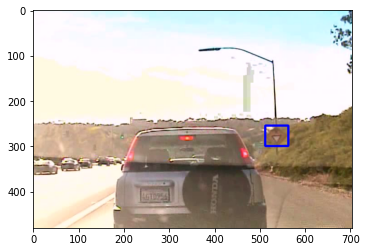

In [7]:
test_dataset(dataset_real, model_real, 4)

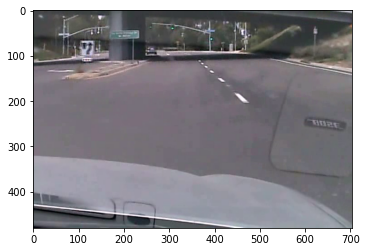

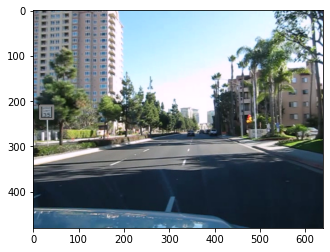

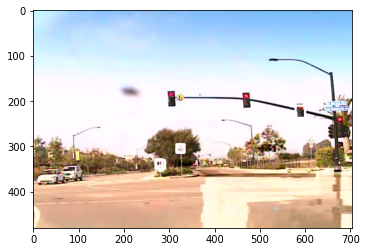

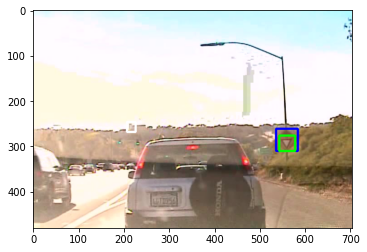

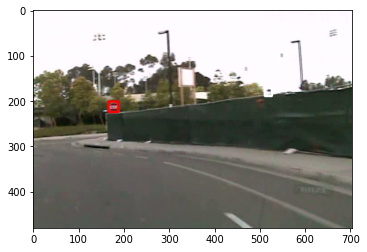

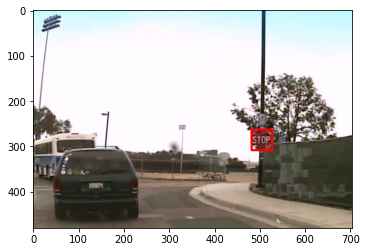

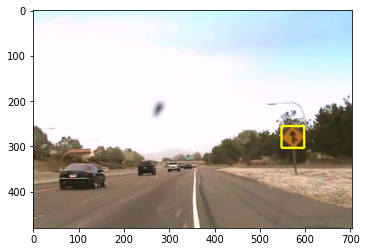

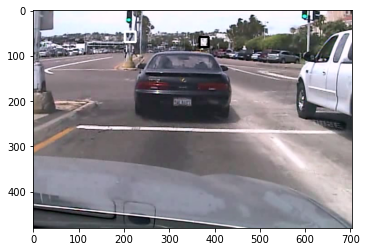

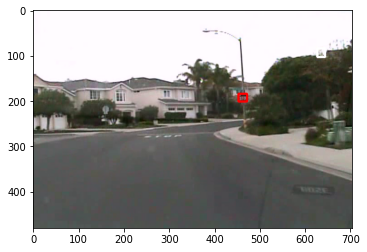

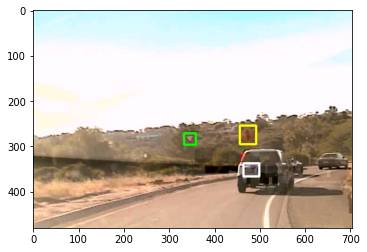

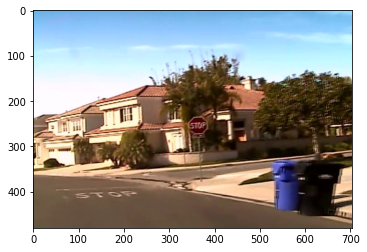

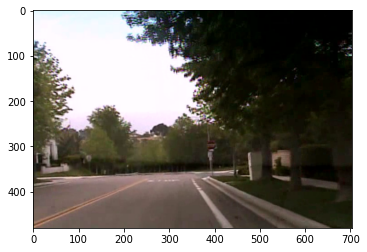

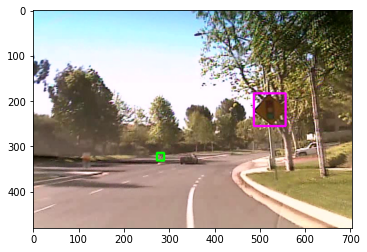

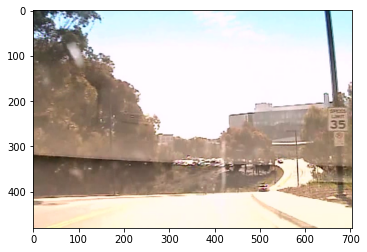

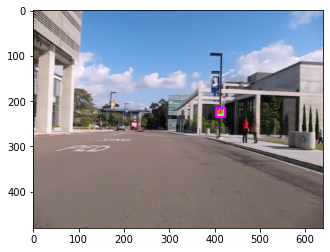

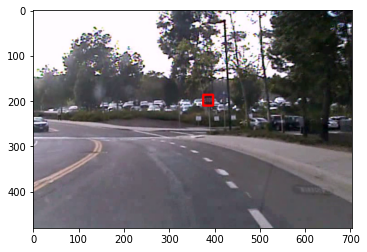

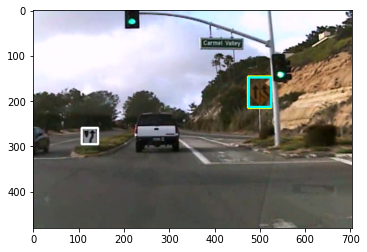

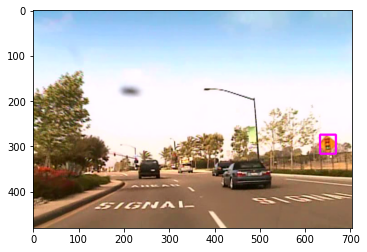

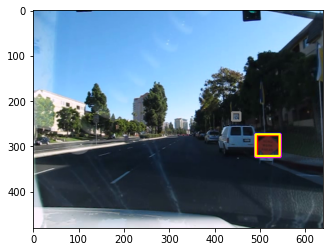

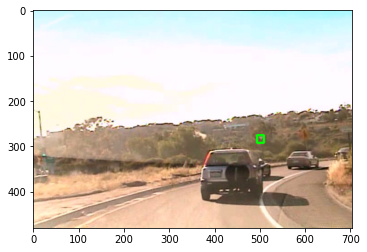

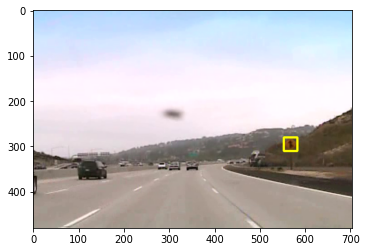

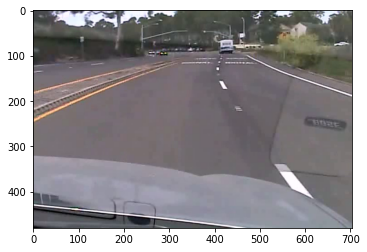

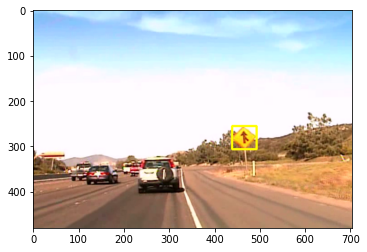

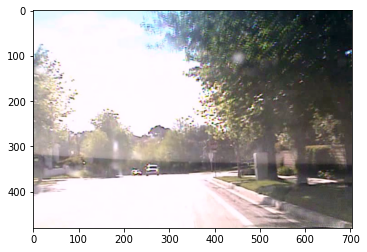

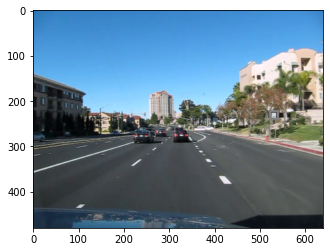

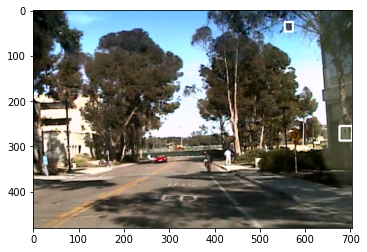

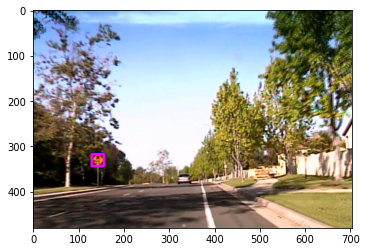

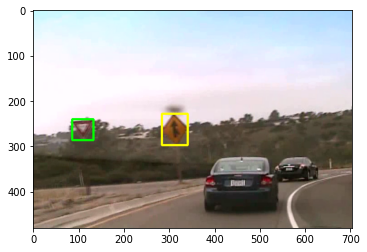

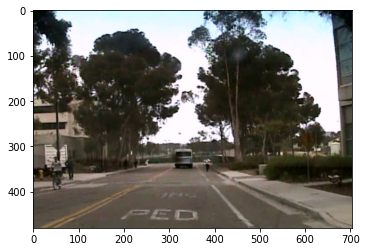

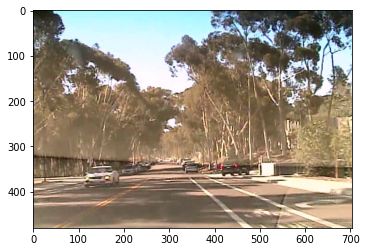

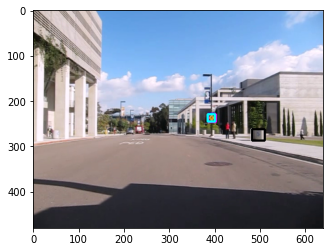

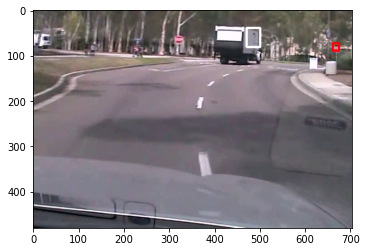

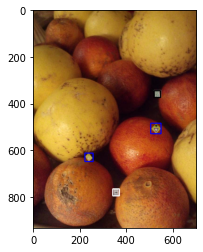

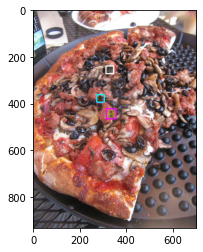

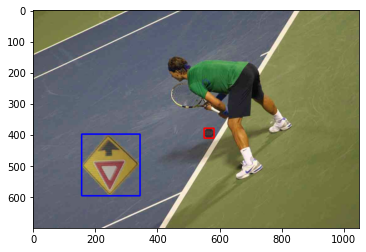

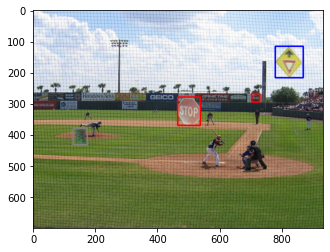

In [10]:
test_dataset(dataset_real, model_fake, 32)
test_dataset(dataset_fake, model_fake, 4)